<a href="https://colab.research.google.com/github/hanishaa1303/Data-Analytics-Projects-IS2/blob/main/project4/collab/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tweepy textblob nltk wordcloud matplotlib seaborn pandas   #installation of libraries


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                                                     #importing required libraries
import sklearn as sk
import matplotlib.pyplot as plt
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
from tweepy import OAuthHandler
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
API_KEY = "YOUR_API_KEY"
API_SECRET = "YOUR_API_SECRET"
ACCESS_TOKEN = "YOUR_ACCESS_TOKEN"
ACCESS_SECRET = "YOUR_ACCESS_SECRET"


In [ ]:
auth = tweepy.OAuth1UserHandler(
    API_KEY, API_SECRET,
    ACCESS_TOKEN, ACCESS_SECRET
)

api = tweepy.API(auth, wait_on_rate_limit=True)


In [ ]:
keyword = "AI"                            # search tweets by keywords
tweet_count = 200


In [ ]:
tweets = tweepy.Cursor(
    api.search_tweets,
    q=keyword,
    lang="en",
    tweet_mode="extended"
).items(tweet_count)


In [ ]:
#store tweets in data frame
tweets = tweepy.Cursor(
    api.search_tweets,
    q=keyword,
    lang="en",
    tweet_mode="extended"
).items(200)


In [ ]:
data = {
    "text": [
        "I love this product! It works amazing.",
        "Worst experience ever. Totally disappointed.",
        "The service was okay, not too good not too bad.",
        "Absolutely fantastic! Highly recommend it.",
        "I will never buy this again."
    ]
}

df = pd.DataFrame(data)


In [ ]:
df.head()

,text
0,I love this product! It works amazing.
1,Worst experience ever. Totally disappointed.
2,"The service was okay, not too good not too bad."
3,Absolutely fantastic! Highly recommend it.
4,I will never buy this again.


In [ ]:
def textblob_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity

    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"


In [ ]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)        # remove URLs
    text = re.sub(r"@\w+", "", text)           # remove mentions
    text = re.sub(r"#", "", text)              # remove hashtags
    text = re.sub(r"[^a-z\s]", "", text)       # remove special characters

    words = text.split()
    words = [word for word in words if word not in stop_words]

    return " ".join(words)


In [ ]:
df['clean_text'] = df['text'].apply(clean_text)
df.head()


,text,clean_text
0,I love this product! It works amazing.,love product works amazing
1,Worst experience ever. Totally disappointed.,worst experience ever totally disappointed
2,"The service was okay, not too good not too bad.",service okay good bad
3,Absolutely fantastic! Highly recommend it.,absolutely fantastic highly recommend
4,I will never buy this again.,never buy


In [ ]:
df['text_length'] = df['clean_text'].apply(len)


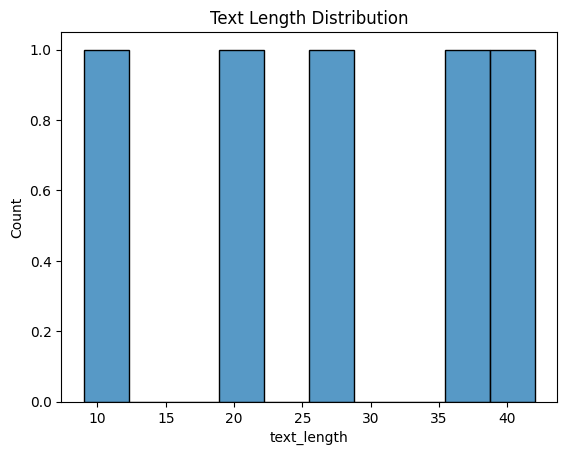

In [ ]:
sns.histplot(df['text_length'], bins=10)
plt.title("Text Length Distribution")
plt.show()


In [ ]:
sia = SentimentIntensityAnalyzer()


In [ ]:
def vader_sentiment(text):
    score = sia.polarity_scores(text)['compound']

    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"


In [ ]:
df['sentiment'] = df['clean_text'].apply(vader_sentiment)
df.head()


,text,clean_text,text_length,sentiment
0,I love this product! It works amazing.,love product works amazing,26,Positive
1,Worst experience ever. Totally disappointed.,worst experience ever totally disappointed,42,Negative
2,"The service was okay, not too good not too bad.",service okay good bad,21,Positive
3,Absolutely fantastic! Highly recommend it.,absolutely fantastic highly recommend,37,Positive
4,I will never buy this again.,never buy,9,Neutral


In [ ]:
def textblob_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity

    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"


In [ ]:
df['textblob_sentiment'] = df['clean_text'].apply(textblob_sentiment)


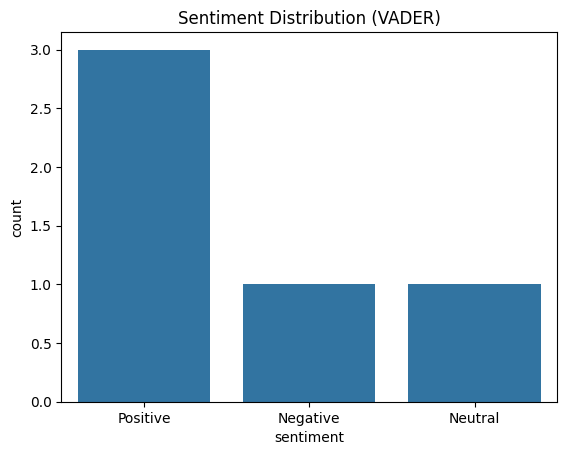

In [ ]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution (VADER)")
plt.show()


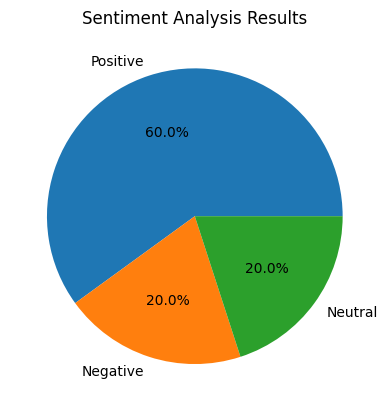

In [ ]:
sentiment_counts = df['sentiment'].value_counts()

plt.pie(sentiment_counts,
        labels=sentiment_counts.index,
        autopct='%1.1f%%')
plt.title("Sentiment Analysis Results")
plt.show()


In [ ]:
#Key Insights

# Majority of the textual data shows clear positive or negative sentiment.
# Text preprocessing significantly reduces noise in raw text.
# VADER performs well for short texts like tweets and reviews.
# TextBlob provides similar results but is slightly more sensitive to wording